# Healthcare Analysis



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns

# Path files
metadata_path = "Data/healthcare_dataset.csv"

# Read the data
metadata = pd.read_csv(metadata_path)

# Display the data table for preview
metadata.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Aaron Burnett,54,Female,A-,Obesity,6/3/21,Samantha Mitchell MD,Reynolds LLC,UnitedHealthcare,7531.642746,470,Emergency,6/19/21,Penicillin,Abnormal
1,Aaron Calderon,35,Female,AB+,Diabetes,5/12/23,Christina Johnson,Mata-Vega,Cigna,47555.486730,285,Elective,6/3/23,Paracetamol,Abnormal
2,Aaron Coleman,69,Male,A+,Cancer,9/17/19,Bill Mcdonald,"Petersen, Haynes and Rowe",Cigna,46762.663210,239,Emergency,10/10/19,Lipitor,Abnormal
3,Aaron Daugherty,34,Male,B+,Diabetes,4/9/22,Christopher Jones,"Silva, Thompson and Austin",Aetna,30468.487110,243,Elective,5/8/22,Aspirin,Inconclusive
4,Aaron Davis,22,Female,AB-,Arthritis,6/28/19,Tyler Thomas,Lee-Clark,UnitedHealthcare,17930.743020,351,Urgent,7/13/19,Paracetamol,Abnormal


In [2]:
#Column data type info
metadata.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [3]:
# Patient count unique
patient_count = metadata["Name"].nunique()

# Get a list of unique medical conditions
medical_conditions_list = metadata['Medical Condition'].unique()

# Get the count of each medical condition
medical_conditions_count = metadata['Medical Condition'].value_counts()

# Display the results
print("Patient Count Unique")
print(patient_count)
      
print("List of Unique Medical Conditions:")
print(medical_conditions_list)

print("Count of Each Medical Condition:")
print(medical_conditions_count)

Patient Count Unique
9378
List of Unique Medical Conditions:
['Obesity' 'Diabetes' 'Cancer' 'Arthritis' 'Asthma' 'Hypertension']

Count of Each Medical Condition:
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


In [4]:
#Filter data based on Gender and Billing Amount
gender_billing_data = metadata[['Gender', 'Billing Amount']]

# Group the data by 'Gender' and 'Billing Amount', then calculate the mean billing amount by
# Gender, rounded to nearest dollar.
mean_gender_amount = gender_billing_data.groupby('Gender').mean()
mean_gender_amount = mean_gender_amount['Billing Amount'].apply(lambda x: '${:,.0f}'.format(round(x)))
print(mean_gender_amount)

Gender
Female    $25,484
Male      $25,550
Name: Billing Amount, dtype: object


In [5]:
#Filter data based on Gender and Billing Amount grouped by Insurance Provider
insurance_gender_data = metadata[['Insurance Provider', 'Gender', 'Billing Amount']]

#Group the data by 'Billing Amount' and 'Gender', then calculate the mean billing amount, rounded to nearest dollar.
mean_insurance_gender = insurance_gender_data.groupby(['Insurance Provider', 'Gender']).mean()
mean_insurance_gender['Billing Amount'] = mean_insurance_gender['Billing Amount'].apply(lambda x: '${:,.0f}'.format(round(x)))

print(mean_insurance_gender)

                          Billing Amount
Insurance Provider Gender               
Aetna              Female        $25,335
                   Male          $26,341
Blue Cross         Female        $26,178
                   Male          $25,158
Cigna              Female        $25,724
                   Male          $25,588
Medicare           Female        $25,008
                   Male          $24,996
UnitedHealthcare   Female        $25,200
                   Male          $25,617


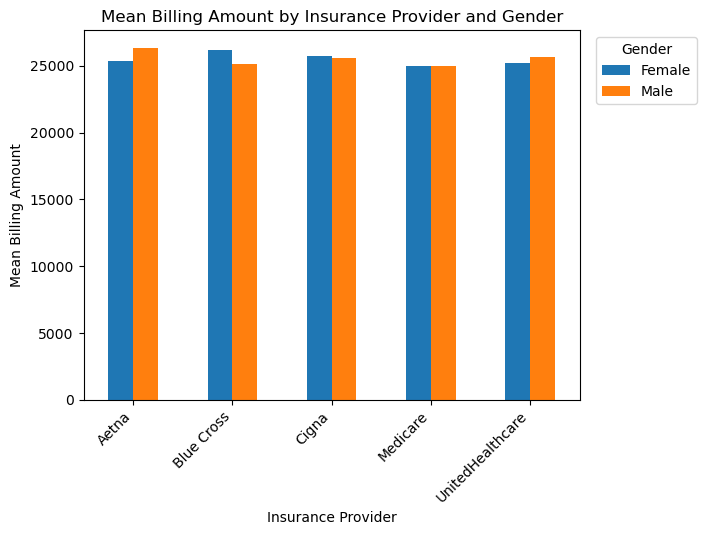

In [6]:
#Undo $ for billing amount to chart
mean_insurance_gender['Billing Amount'] = mean_insurance_gender['Billing Amount'].replace('[\$,]', '', regex=True).astype(float)

#Create barchart for comparison of Insurance Providers Billing Amount by Gender 
mean_insurance_gender['Billing Amount'].unstack().plot(kind='bar')

# Add labels and title
plt.xlabel('Insurance Provider')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Billing Amount')
plt.title('Mean Billing Amount by Insurance Provider and Gender')
plt.legend(title='Gender', bbox_to_anchor=(1.25, 1), loc='upper right')

In [8]:
# Filter data based on Medical Condition and Billing Amount for Medical Condition grouped by Insurance Provider
mean_billing_by_condition = metadata.groupby(['Medical Condition', 'Insurance Provider'])['Billing Amount'].mean()

# Group the data by 'Medical Condition' and 'Insurance', then calculate the mean billing amount
mean_billing_by_condition = mean_billing_by_condition.reset_index()

print(mean_billing_by_condition)

   Medical Condition Insurance Provider  Billing Amount
0          Arthritis              Aetna    24694.858132
1          Arthritis         Blue Cross    25989.515740
2          Arthritis              Cigna    25189.873894
3          Arthritis           Medicare    24206.381013
4          Arthritis   UnitedHealthcare    25704.428629
5             Asthma              Aetna    24761.515983
6             Asthma         Blue Cross    25701.560294
7             Asthma              Cigna    26604.203083
8             Asthma           Medicare    25820.568227
9             Asthma   UnitedHealthcare    24198.125815
10            Cancer              Aetna    26333.940941
11            Cancer         Blue Cross    24382.770930
12            Cancer              Cigna    26437.599998
13            Cancer           Medicare    25118.720557
14            Cancer   UnitedHealthcare    25222.992960
15          Diabetes              Aetna    26703.077342
16          Diabetes         Blue Cross    26599